In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9

In [2]:
def parser(time_data):
    return pd.datetime.strptime('2017-'+time_data,'%Y-%d-%m %H:%M:%S')
data3 = pd.read_csv('../data/namenode_1130.csv',header=0,index_col=0, parse_dates=[0], date_parser=parser)

In [3]:
data = data3.rename(columns={'cpu process':'top_cpu','memory process':'top_mem'})
data['top_cpu'] = data['top_cpu'].str.partition('/')[0]
data['top_mem'] = data['top_mem'].str.partition('/')[0]

In [4]:
data.columns.values

array(['usr', 'sys', 'idl', 'wai', 'hiq', 'siq', 'used', 'buff', 'cach',
       'free', 'recv', 'send', 'read', 'writ', 'top_cpu', 'top_mem'], dtype=object)

Text(0.5,1,u'usr')

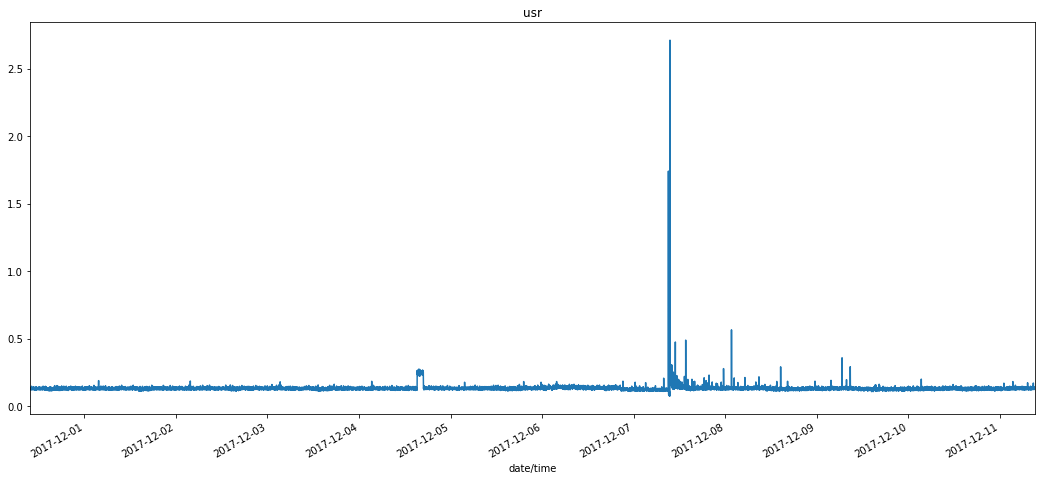

Text(0.5,1,u'sys')

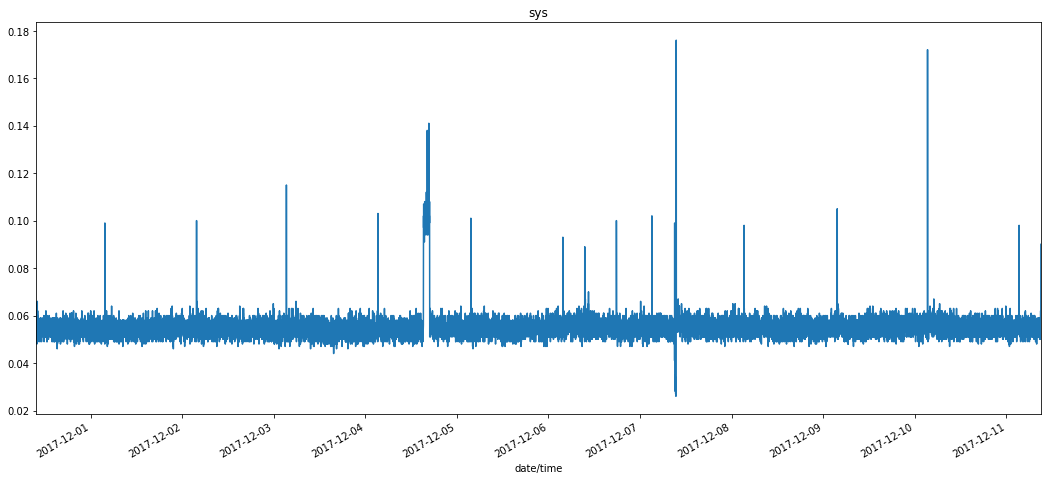

Text(0.5,1,u'used')

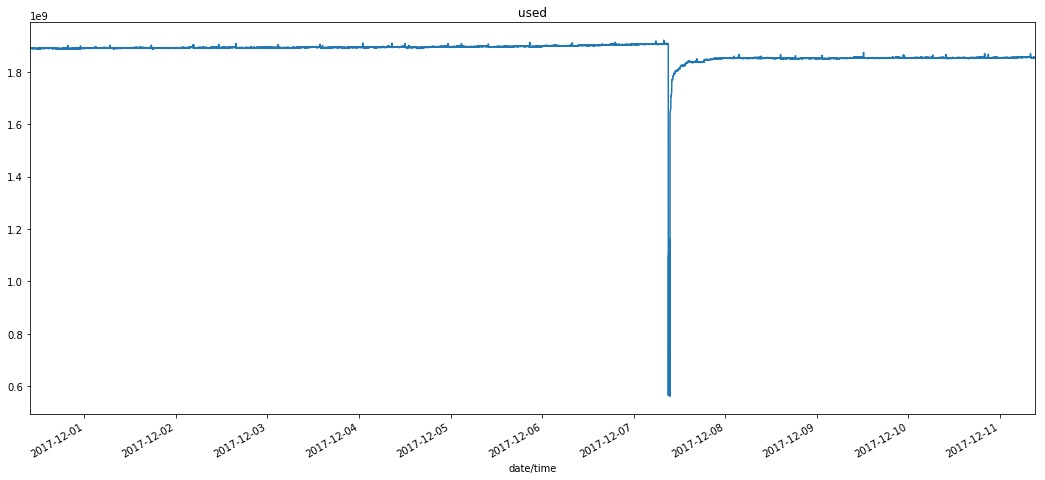

Text(0.5,1,u'buff')

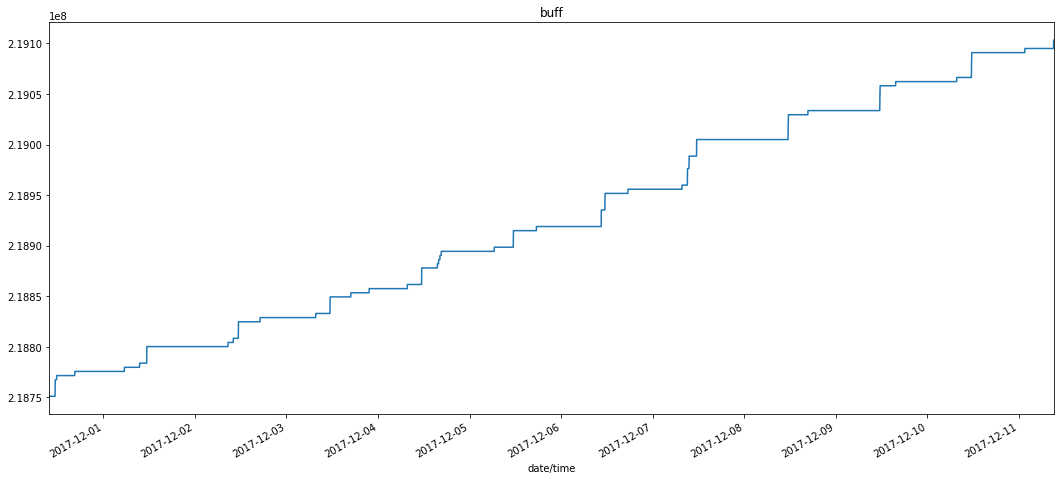

Text(0.5,1,u'cach')

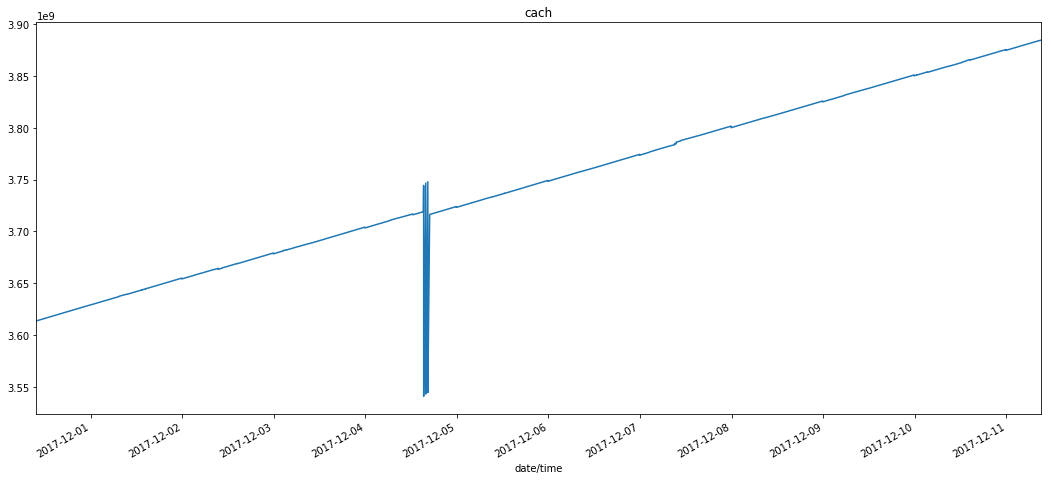

Text(0.5,1,u'free')

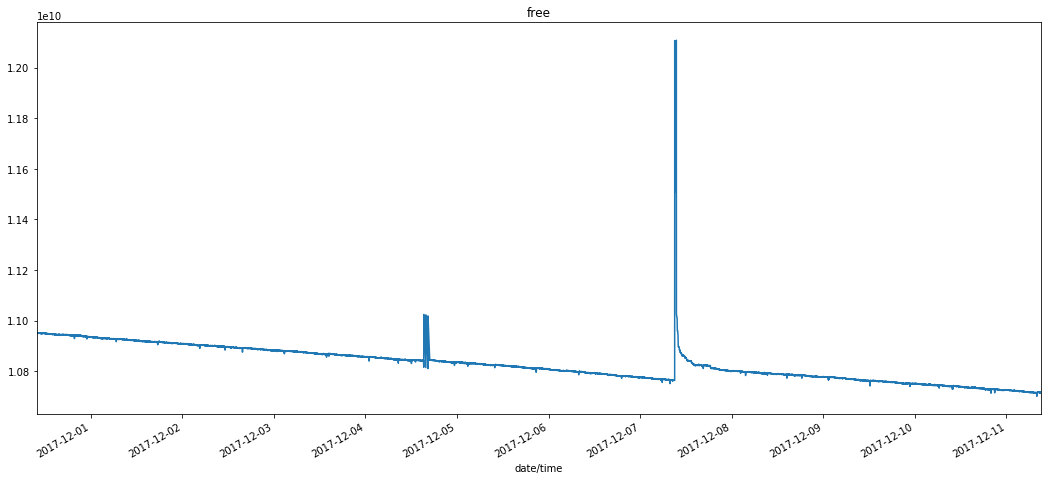

Text(0.5,1,u'recv')

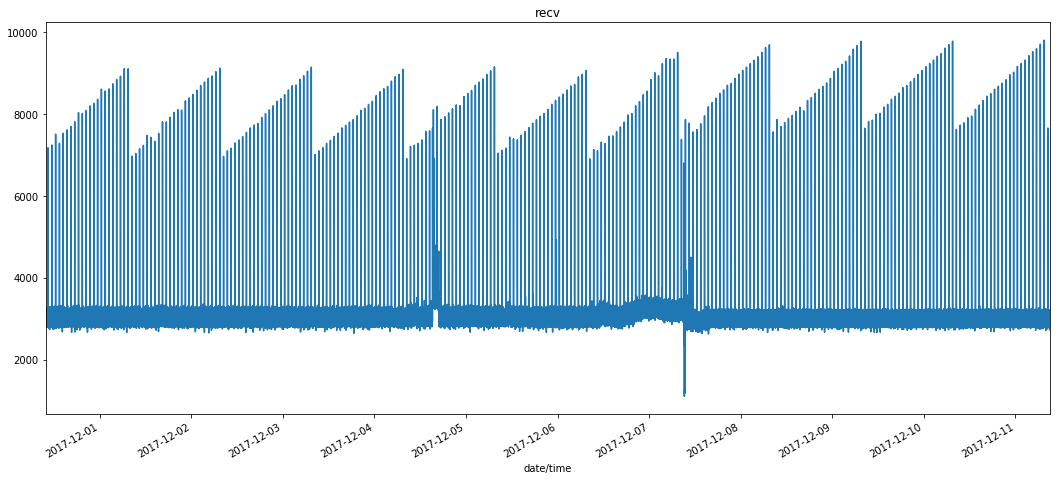

Text(0.5,1,u'send')

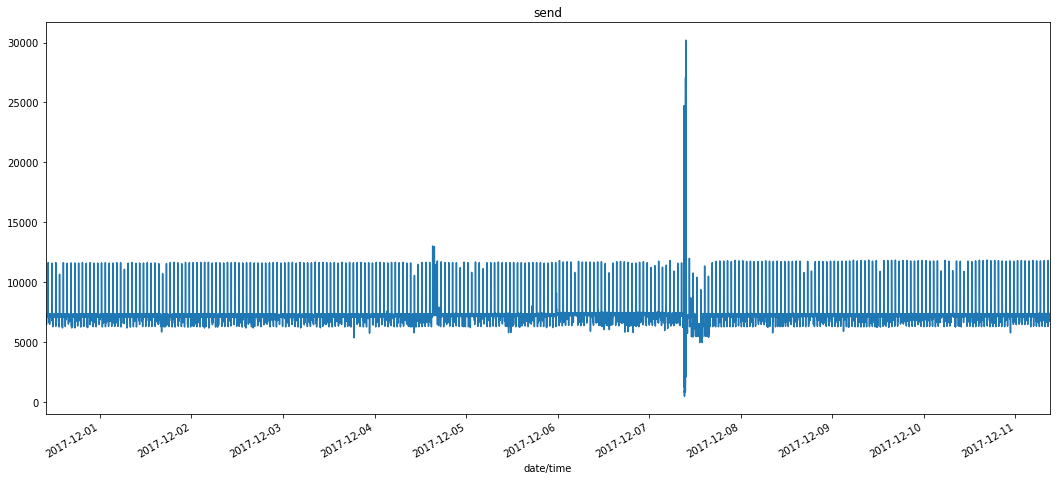

Text(0.5,1,u'read')

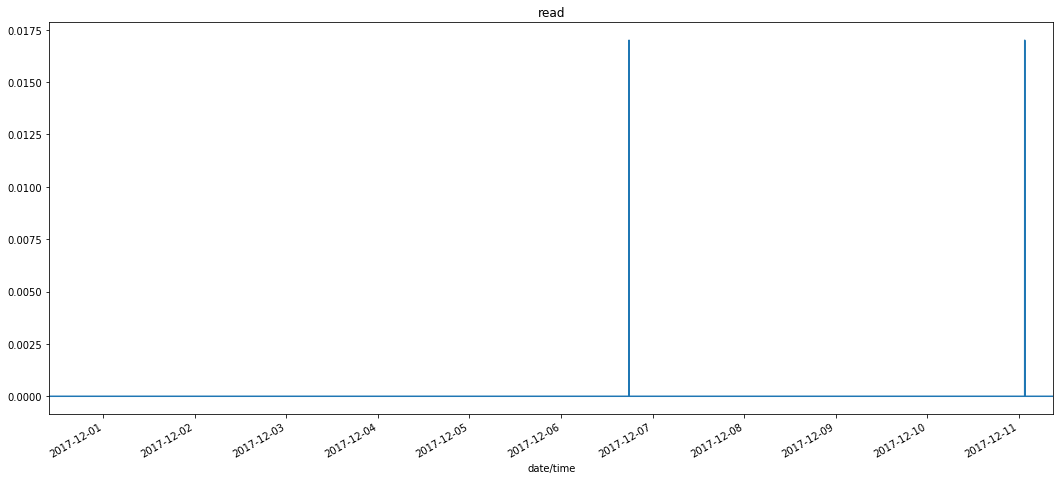

Text(0.5,1,u'writ')

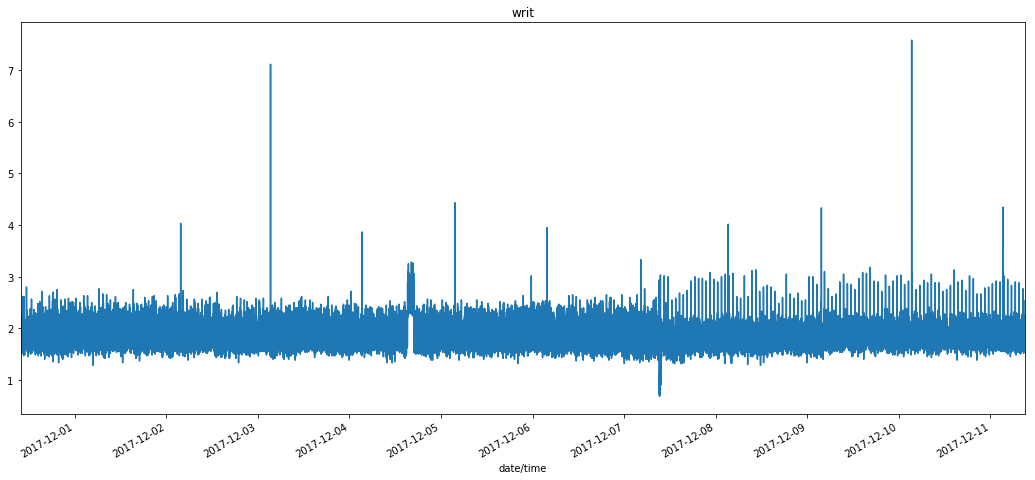

In [5]:
cols = ['usr', 'sys', 'used', 'buff', 'cach','free', 'recv', 'send', 'read', 'writ']
for col in cols:
    data[col].plot()
    plt.gcf().set_size_inches(18,8)
    plt.title(col)
    plt.show()

# 孤异森林

In [91]:
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing

tmp_data=data.loc[:,['usr','used','read']]

# normalize the dataset
scaler = preprocessing.MinMaxScaler()
tmp_data['norm_usr'] = scaler.fit_transform(tmp_data['usr'].values.reshape(-1,1))
tmp_data['norm_used'] = scaler.fit_transform(tmp_data['used'].values.reshape(-1,1))
tmp_data['norm_read'] = scaler.fit_transform(tmp_data['read'].values.reshape(-1,1))
ilf = IsolationForest(n_estimators=100,contamination=0.01,n_jobs=-1,verbose=2)
ilf.fit(tmp_data['norm_used'].values.reshape(-1,1))
tmp_data['ilf'] = ilf.predict(tmp_data['norm_used'].values.reshape(-1,1))

Building estimator 1 of 5 for this parallel run (total 100)...
Building estimator 1 of 5 for this parallel run (total 100)...
Building estimator 1 of 5 for this parallel run (total 100)...
Building estimator 2 of 5 for this parallel run (total 100)...
Building estimator 2 of 5 for this parallel run (total 100)...
Building estimator 3 of 5 for this parallel run (total 100)...
Building estimator 1 of 5 for this parallel run (total 100)...
Building estimator 1 of 4 for this parallel run (total 100)...
Building estimator 2 of 5 for this parallel run (total 100)...
Building estimator 4 of 5 for this parallel run (total 100)...
Building estimator 3 of 5 for this parallel run (total 100)...
Building estimator 5 of 5 for this parallel run (total 100)...
Building estimator 2 of 5 for this parallel run (total 100)...
Building estimator 1 of 4 for this parallel run (total 100)...
Building estimator 2 of 4 for this parallel run (total 100)...
Building estimator 1 of 4 for this parallel run (total 

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    0.1s remaining:    0.9s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    0.3s finished


IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=-1, random_state=None,
        verbose=2)

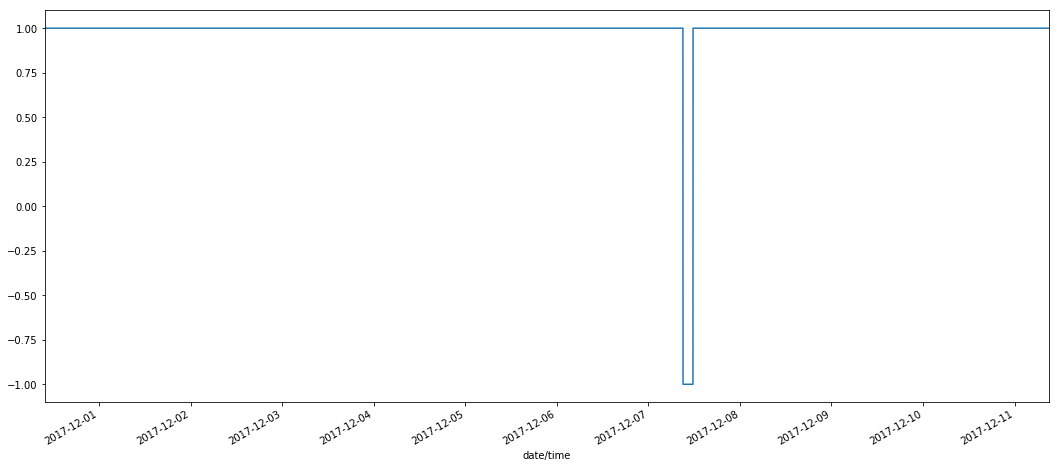

In [92]:
# fu = tmp_data.loc[tmp_data.ilf==-1]
# zh = tmp_data.loc[tmp_data.ilf==1]
# plt.scatter(fu.index.values,fu.ilf,s=0.1,c='r')
# plt.scatter(zh.index.values,zh.ilf,s=0.01,c='b')
tmp_data.ilf.plot()
plt.gcf().set_size_inches(18,8)
plt.show()

In [85]:
values = tmp_data.ilf.unique()
tmp_data['ilf'].value_counts()
tmp_data.describe()

-1    15797
Name: ilf, dtype: int64

,usr,used,read,norm_usr,norm_used,norm_read,ilf
count,15797.000000,1.579700e+04,15797.000000,15797.000000,15797.000000,15797.000000,15797.0
mean,0.131040,1.876904e+09,0.000002,0.022381,0.967860,0.000127,-1.0
std,0.029771,4.063919e+07,0.000191,0.011285,0.029905,0.011252,0.0
min,0.072000,5.616189e+08,0.000000,0.000000,0.000000,0.000000,-1.0
25%,0.124000,1.853247e+09,0.000000,0.019712,0.950452,0.000000,-1.0
50%,0.129000,1.891164e+09,0.000000,0.021607,0.978353,0.000000,-1.0
75%,0.135000,1.894789e+09,0.000000,0.023882,0.981020,0.000000,-1.0
max,2.710000,1.920582e+09,0.017000,1.000000,1.000000,1.000000,-1.0
